We observe $n$ clients. Each client $i$ survives for a duration of $T_i\geq 1$ month. Let a random sample of $n$ iid random variables $T_1 , \ldots , T_n$ following an exponential distribution of unknown parameter $\theta$. From $T$ is defined $Y$ such that:
$$Y_i = \min (T_i, a_i)$$
Where:
* $\mathcal{A} := \{i \in \{1,2,...,n\} : Y_i< a_i\}$
* $a_i$ is the duration from the arrival of client $i$ to time of observation
* $Y_i$ is the duration before the client $i$ churned

In [68]:
# imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pareto
import random
import functions as f

In [69]:
# %run functions.py

In [70]:
#GLOBAL CONSTANTS
clv_theory = 10 
size= 10000 # size of each sample
n = 10000 # number of samples
DureeObs = 12*2 # duration of observation

## PARETO - Not censored

We assume that the distribution of the the lifetime values of customers follows a pareto distribution (the success would be defined by the event of "churn"). Here, we suppose also that the data is not censored which means that all the lifetime values are known.

In [71]:
shape = 3
scale = 1
clv_theory = (shape * scale) /(shape - 1 )

<AxesSubplot: ylabel='Count'>

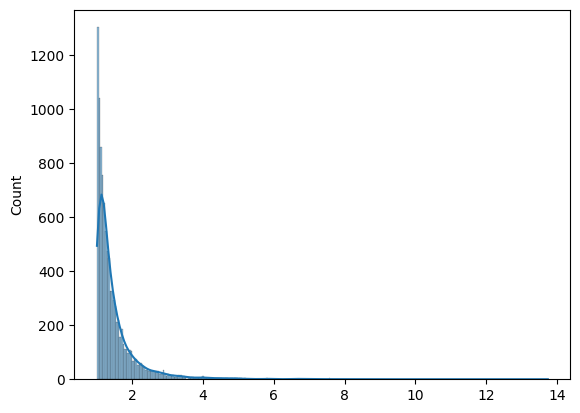

In [72]:
Tn = f.generate_nc_pareto(clv_theory, size)
sns.histplot(Tn, kde = True)

First, we are going to use a Monte Carlo simulation where we generate `n` samples and compute the clv values with the theoretical estimator. After that, we are going to see how it converges to the supposed clv in theory.


The theoretical estimator is given by:

$$\hat{CLV} := \frac{1}{1- \frac{1}{n} \sum_{i=1}^n log(y_i)}$$

In [73]:
# CONSTANT desining if the data is going to be censored or not
censored = 0
# Monte Carlo simulation
clv_pareto, Y_n = f.monte_carlo(clv_theory, size, n, censored, f.pareto_nc_clv_estimator, f.generate_nc_pareto)

CONVERGENCE :
 	 size of each dataset =10000 
 	 number of datasets =10000 
 	 CLV thoery = 1.50 
 	 CLV real = 1.500083  
 	 Standard deviation CLV= 0.007470


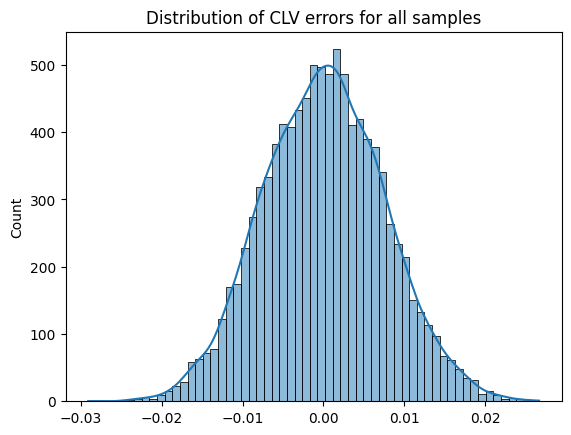

In [74]:
# plot clv errors distribution
f.print_conv_plot_distribution(size, n ,clv_theory, clv_pareto)

For all the samples $Y_i$ for $i\in \{1,...,n\}$ the prediction error $(prediction_i - expectation_i)$ folllows a gaussian distribution with mean 0.


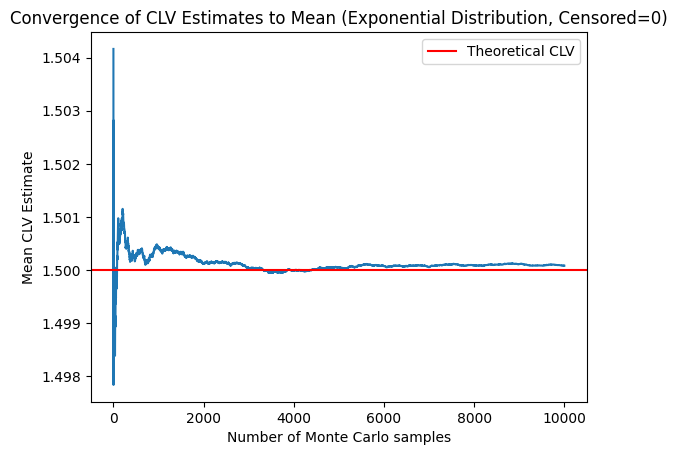

In [75]:
f.clv_convergence(clv_pareto, clv_theory,n , 'Convergence of CLV Estimates to Mean (Exponential Distribution, Censored=0)')

**Confidence interval Monte Carlo**

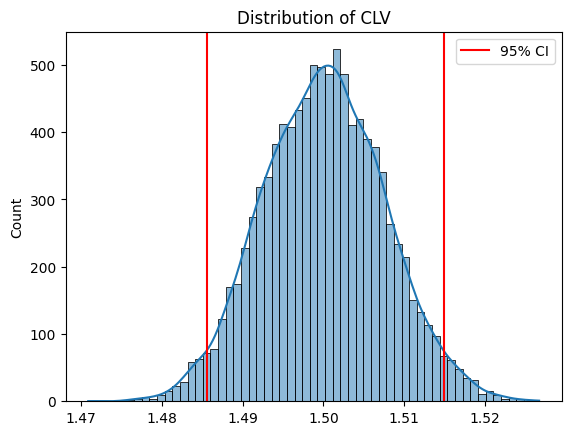

IC = [1.485638 , 1.514968 ] 


In [76]:
lower_pareto_nc, upper_pareto_nc = CI_plot_95(clv_pareto, 0.05)

# Pareto - censored

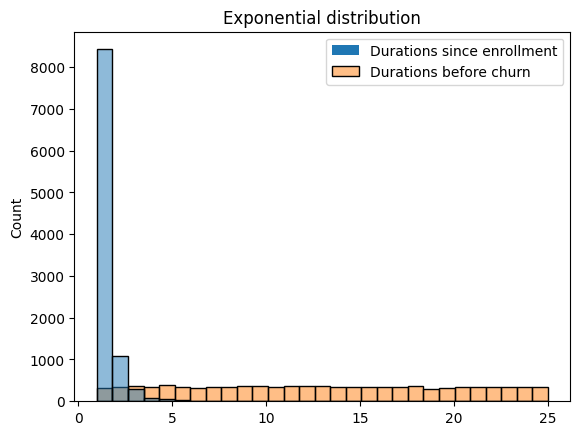

In [77]:
sns.histplot( f.generate_c_pareto(clv_theory, size,DureeObs)).set(title="Exponential distribution")
plt.legend(['Durations since enrollment','Durations before churn'])
plt.show()

For a giver customer, if its `Duration before churn < Duration since enrollment` it means that he churned, else he's still in the company.

Let's study the coherence of the estimator (based on pareto distribution with censored data).
The theoretical estimator is given by: 
$$\hat{CLV} := \frac{1}{1- \frac{1}{|D_n|} \sum_{i=1}^n log(y_i)}$$

In [78]:
# CONSTANT
censored = 1
# Monte Carlo simulation
clv_pareto_c, Y_n = f.monte_carlo(clv_theory, size, n, censored, f.pareto_c_clv_estimator, f.generate_c_pareto)

CONVERGENCE :
 	 size of each dataset =10000 
 	 number of datasets =10000 
 	 CLV thoery = 1.50 
 	 CLV real = 1.500207  
 	 Standard deviation CLV= 0.007497


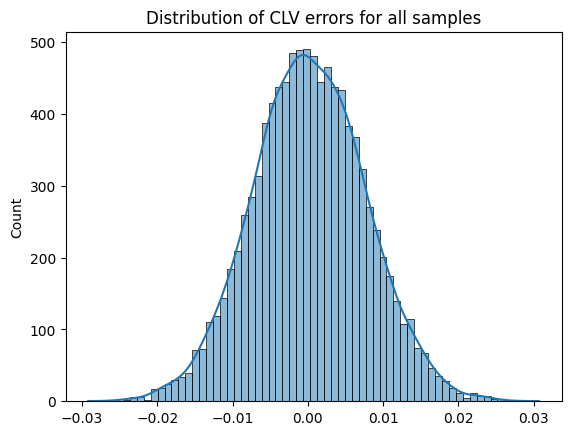

In [79]:
f.print_conv_plot_distribution(size, n ,clv_theory, clv_pareto_c)

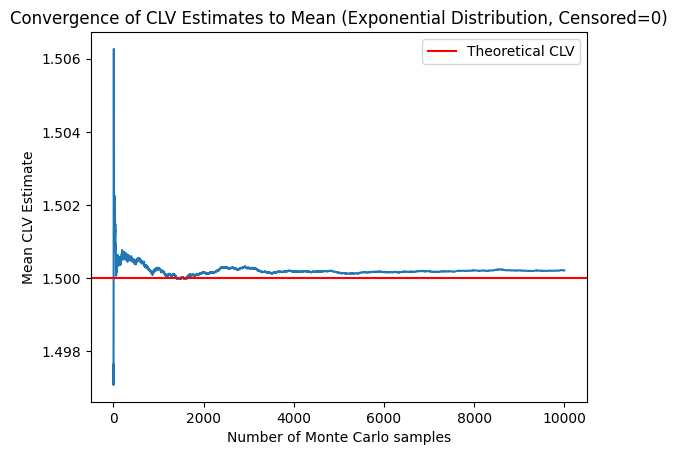

In [80]:
f.clv_convergence(clv_pareto_c, clv_theory,n , 'Convergence of CLV Estimates to Mean (Exponential Distribution, Censored=0)')

**Confidence interval - Monte Carlo**

In [81]:
lower_pareto_c = [] 
upper_pareto_c = []
# for every dataset we compute the lower an upper bound
for i in range(n):
    lower_pareto_c.append(f.CI_pareto_c_clv(1.96, Y_n[i][0], Y_n[i][1])[0])
    upper_pareto_c.append(f.CI_pareto_c_clv(1.96, Y_n[i][0], Y_n[i][1])[1])

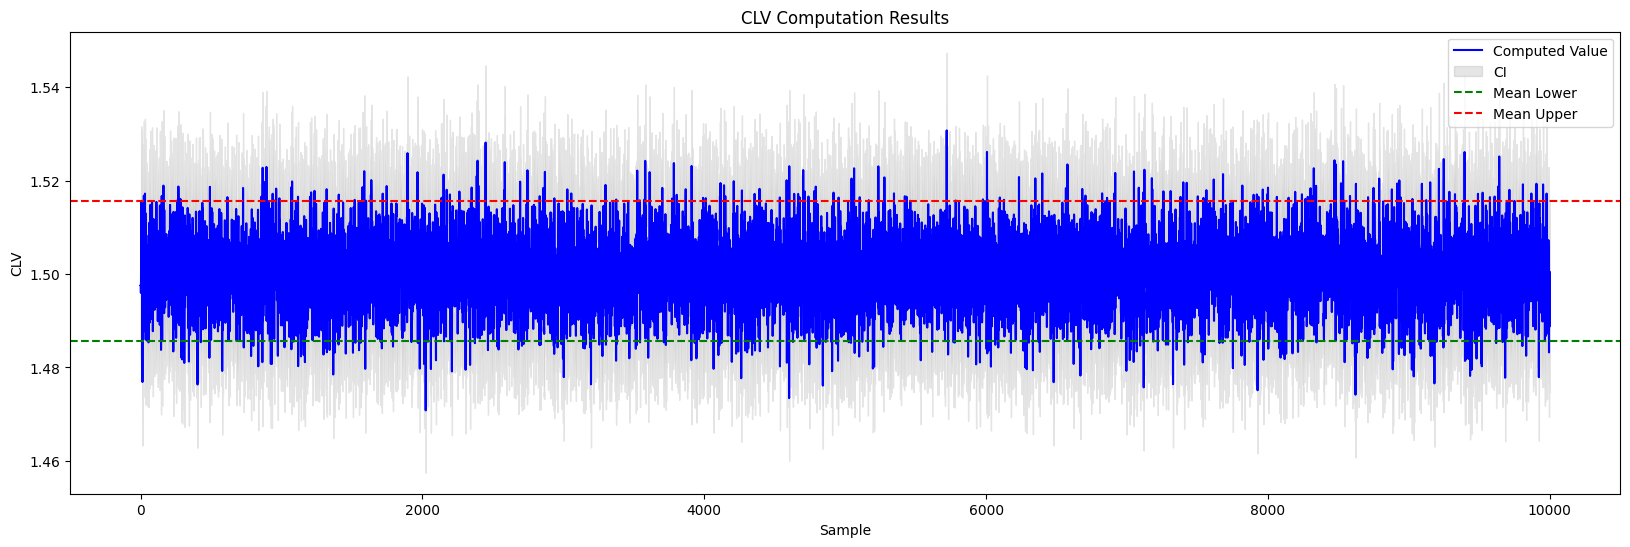

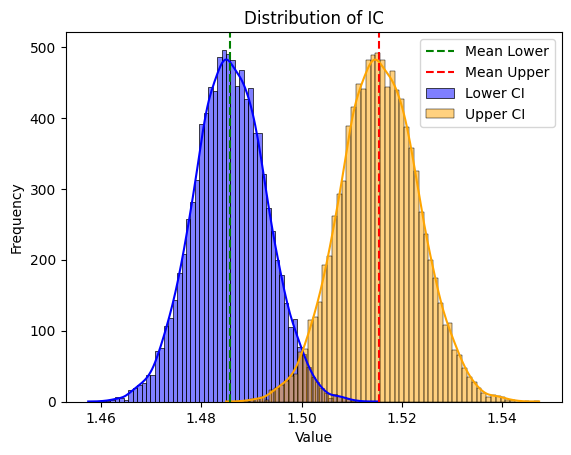

Theoretical CI = [1.4857714804946853, 1.5155273139770142].
CONFIDENCE LEVEL: 95.28% of estimators are within this interval


In [82]:
# plot confidence interval
f.CI_multiplot(clv_pareto_c, lower_pareto_c, upper_pareto_c)

**Confidence interval - Bootstrap**

When working with real world data, we are more likely to have only one dataset, we need to generate our IC from bootstrap. 
Let's  study the impact of bootstrap from our real world dataset

In [83]:
# GENERATE one sample to study the effect of boostrapping
Y_n =[]
T, A = f.generate_c_pareto(clv_theory, size, DureeObs)
Y_n.append(T)
Y_n.append(A)

In [84]:
lower_exp_ct , upper_exp_ct = f.CI_exp_c_clv(1.96, T, A)
print("IC theory = [%f,%f]"%(lower_exp_ct,upper_exp_ct))

IC theory = [1.474545,1.534225]


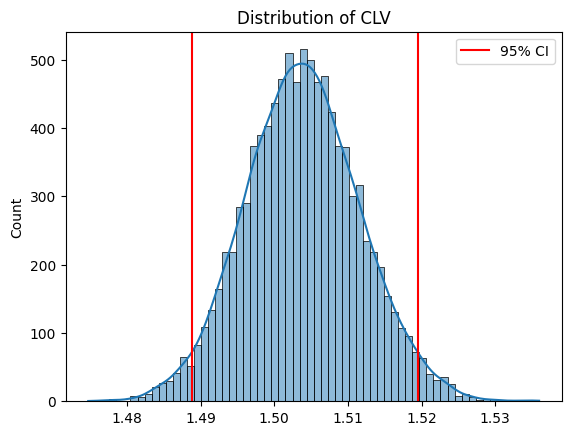

IC = [1.488847 , 1.519454 ] 


In [85]:
_,_ , clv_exp_cb = f.bootstrap_samples(Y_n, censored, f.exp_c_clv_estimator)
lower_exp_cb, upper_exp_cb  = f.CI_plot_95(clv_exp_cb, 0.05)

In [86]:
print("Bootstrapping method IC lower bound is %.3f %% different from the theoretical IC lower bound."%(round(100*abs(lower_exp_cb-lower_exp_ct)/lower_exp_cb,3)))
print("Bootstrapping method IC upper bound is %.3f %% different from the theoretical IC upper bound."%(round(100*abs(upper_exp_cb-upper_exp_ct)/upper_exp_cb,3)))

Bootstrapping method IC lower bound is 0.961 % different from the theoretical IC lower bound.
Bootstrapping method IC upper bound is 0.972 % different from the theoretical IC upper bound.


Generateur Loi gamma

In [87]:
# GENERATOR WITH TWO PARETO DISTRIBUTION
# Parameters
n = 10000
DureeObs = 12*2

moyenne1 = 4  # Mean in the first group
shape1 = 0.1  # Small shape: close to exponential distribution

moyenne2 = 9  # Mean in the second group
shape2 = 0.4  # Larger shape: heavy-tailed distribution

ratio_classe = 0.3  # Proportion of clients in the first group in the dataset

# Expectation across both groups
CLV = ratio_classe*moyenne1+(1-ratio_classe)*moyenne2

# Data generation
location1 = 0
scale = moyenne1*(1-shape1)-location1
T1 = np.random.gamma(shape1, scale, n)

location2 = 0
scale = moyenne2*(1-shape2)-location2
T2 = np.random.gamma(shape2, scale, n)

ber = np.random.rand(n) > ratio_classe

T = (1-ber)*T1 + ber*T2

Duree_depuis_souscription = DureeObs * np.random.rand(n)
Y = T*(T<Duree_depuis_souscription)
#Y = np.where(T<Duree_depuis_souscription, T, np.nan)
Y = np.where(T<Duree_depuis_souscription, T, Duree_depuis_souscription)


#The data is now (Y, Duree_depuis_souscription)